# Machine learning



## EXERCISE: Simple linear regression

[Adapted from Data Science from Scratch, Ch. 14.]

For this exercise, we'll build simple linear regression from scratch following the text book.

We'll use the data from the book's imaginary social network (DataSciencester):

* `num_friends` is the friend count for each user.
* `daily_minutes` is the average time spend per day on the site for each user.

In [ ]:
import numpy as np
num_friends = np.array([100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
daily_minutes =np.array([1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84])


In [ ]:
# 1 - Mostly the same with some small tolerable differences.
import numpy as np
print('\n Doing stats for number of friends:')
print('-'*47)
print('{:15} {:>15} '.format('Statistic', 'Value'))
print('-'*47)
for np_fn in [np.mean, np.var, np.std]:
    print('{:15} {:15.2f} '.format(np_fn.__name__, np_fn(num_friends), np_fn(num_friends)))
print('-'*47)

# 2 -
from scipy.stats import pearsonr
print('\nCorrelation: {:.3f}'.format(pearsonr(num_friends, daily_minutes)[0]))



 Doing stats for number of friends:
-----------------------------------------------
Statistic                 Value 
-----------------------------------------------
mean                       7.33 
var                       81.14 
std                        9.01 
-----------------------------------------------

Correlation: 0.247


### Removing outliers

Let's have a look at the data.

The data point for somebody who has 100 friends but spends 1 minute per day looks like an outlier.

This leads to much stronger correlation.


Scatter plot for daily minutes vs number of friends:


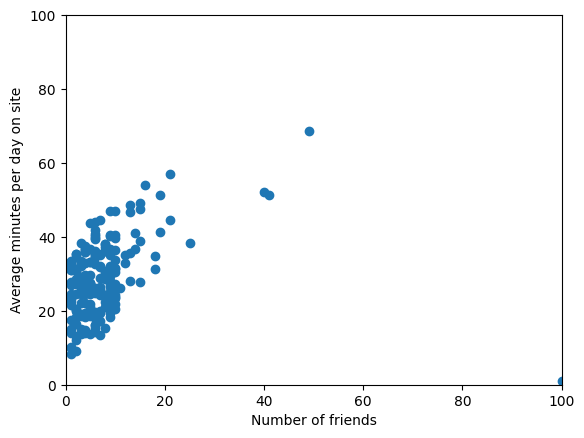

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

print('\nScatter plot for daily minutes vs number of friends:')
_ = plt.scatter(num_friends, daily_minutes)
_ = plt.xlim(0,100)
_ = plt.ylim(0,100)
_ = plt.xlabel('Number of friends')
_ = plt.ylabel('Average minutes per day on site')



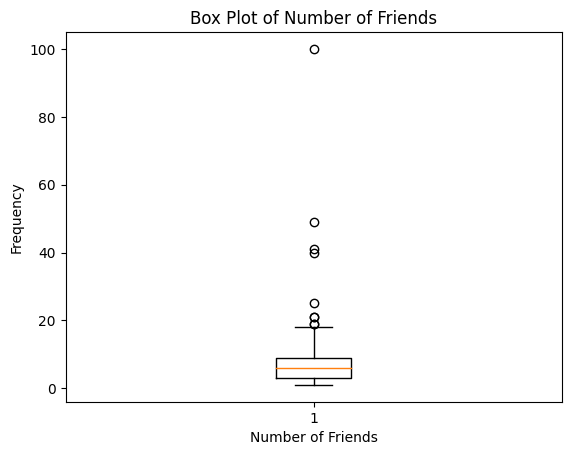

In [ ]:
# Create box plot
plt.boxplot(num_friends)

# Labels and title
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.title('Box Plot of Number of Friends')

# Show plot
plt.show()

In [ ]:
import pandas as pd
# Function to remove outliers using boxplot
def remove_outliers_using_boxplot(X):
    # Calculate the first and third quartiles
    Q1 = np.quantile(X, 0.25, axis=0)
    Q3 = np.quantile(X, 0.75, axis=0)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the outlier bounds
    lower_bound = Q1 - 3 * IQR # common values are 1.5 or 3
    upper_bound = Q3 + 3 * IQR

    # Find outliers
    outliers = ((X < lower_bound) | (X > upper_bound))
    #outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)


    # Remove outliers
    X_no_outliers = X[~outliers]

    return X_no_outliers

In [ ]:
# Remove outliers from training data
num_friends_good = remove_outliers_using_boxplot(num_friends)
daily_minutes_good = daily_minutes[~((num_friends < num_friends_good.min(axis=0)) | (num_friends > num_friends_good.max(axis=0)))]
#daily_minutes_good = daily_minutes[~((num_friends < num_friends_good.min(axis=0)) | (num_friends > num_friends_good.max(axis=0))).any(axis=1)]


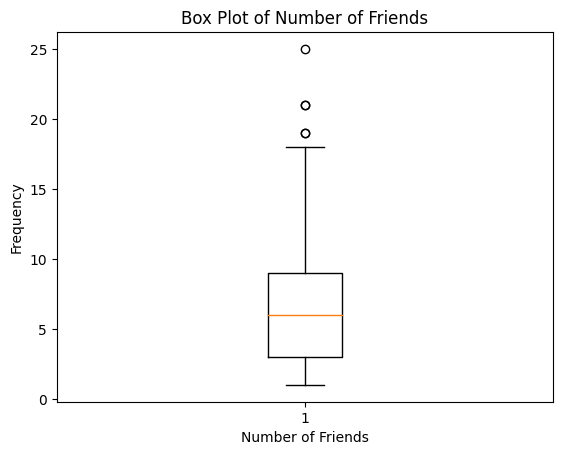

In [ ]:
# Create box plot
plt.boxplot(num_friends_good)

# Labels and title
plt.xlabel('Number of Friends')
plt.ylabel('Frequency')
plt.title('Box Plot of Number of Friends')

# Show plot
plt.show()


Scatter plot for daily minutes vs number of friends after removing outliers:


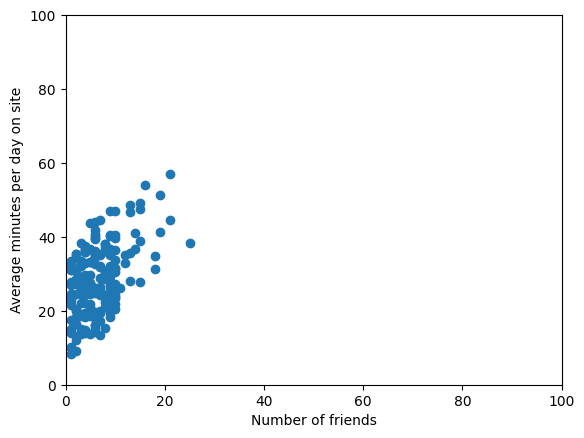

In [ ]:
print('\nScatter plot for daily minutes vs number of friends after removing outliers:')
_ = plt.scatter(num_friends_good, daily_minutes_good)
_ = plt.xlim(0,100)
_ = plt.ylim(0,100)
_ = plt.xlabel('Number of friends')
_ = plt.ylabel('Average minutes per day on site')

In [ ]:
print('Correlation before outlier removal: {:.3f}'.format(pearsonr(num_friends, daily_minutes)[0]))
print('Correlation after outlier removal: {:.3f}'.format(pearsonr(num_friends_good, daily_minutes_good)[0]))

Correlation before outlier removal: 0.247
Correlation after outlier removal: 0.487


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(num_friends_good.reshape(-1, 1), daily_minutes_good, test_size=0.2, random_state=42)

# Now let's fit a model
lm = LinearRegression()
lm.fit(X_train, Y_train)

print('Intercept:', lm.intercept_)
print('Coefficients:\n', lm.coef_)


# We use the score method to get r-squared
print('\nR-squared:', lm.score(X_train, Y_train))

# We can predict the daily minute for a new friends
print('\nPredicted daily minutes of first five friends from test split:\n', lm.predict(X_train)[:5])
print('\nActual daily minutes of first five friends from test split:\n', Y_train[:5])

# We can also calculate the standard error
stderr = math.sqrt(np.mean((Y_train - lm.predict(X_train))**2))
print('\nStandard error:', stderr)



Intercept: 22.033891748168536
Coefficients:
 [1.03549254]

R-squared: 0.2517503942389405

Predicted daily minutes of first five friends from test split:
 [29.28233956 23.06938429 31.35332464 32.38881719 26.17586192]

Actual daily minutes of first five friends from test split:
 [24.26 27.81 32.24 31.65 22.2 ]

Standard error: 8.182455203019325


 ## Redraw the scatterplot from above. This time use `plt.plot` to overlay the regression line and the 95% prediction interval at + and - 2 times the calculated standard error.


Scatter plot with regression line and 95% prediction interval:


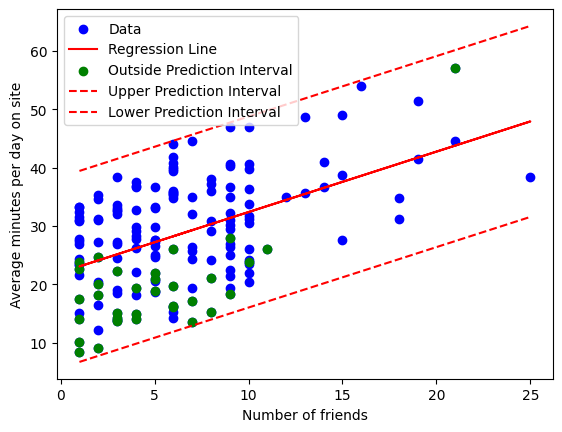

In [ ]:
Y_pred = lm.predict(X_train)
# Scatter plot
plt.scatter(X_train, Y_train, color='blue', label='Data')
print('\nScatter plot with regression line and 95% prediction interval:')

# Plot regression line
plt.plot(X_train, Y_pred, color='red', label='Regression Line')





X_range = np.linspace(np.min(X_train), np.max(X_train), 160).reshape(-1, 1)

Y_pred_range = lm.predict(X_range)
prediction_interval = 2 * stderr
upper_bound = Y_pred_range + prediction_interval
lower_bound = Y_pred_range - prediction_interval

# Highlight points outside the prediction interval
outside_interval = (Y_train < lower_bound) | (Y_train > upper_bound)
plt.scatter(X_train[outside_interval], Y_train[outside_interval], color='green', label='Outside Prediction Interval')



# Plot upper and lower bounds of prediction interval
plt.plot(X_range, upper_bound, color='red', linestyle='--', label='Upper Prediction Interval')
plt.plot(X_range, lower_bound, color='red', linestyle='--', label='Lower Prediction Interval')

plt.xlabel('Number of friends')
plt.ylabel('Average minutes per day on site')
plt.legend()



Residual plot for training data (blue) and test data (green):


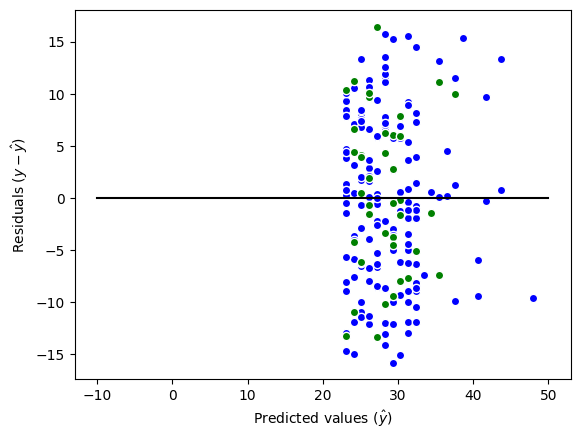

In [ ]:
# 4 - Yes the linear model is appropriate
print('\nResidual plot for training data (blue) and test data (green):')
_ = plt.scatter(lm.predict(X_train), Y_train-lm.predict(X_train), c='blue',  edgecolor='white')
_ = plt.scatter(lm.predict(X_test), Y_test-lm.predict(X_test), c='green',  edgecolor='white')
_ = plt.plot([-10,50], [0,0], c='black')
_ = plt.ylabel('Residuals ($y - \hat{y}$)')
_ = plt.xlabel('Predicted values ($\hat{y}$)')

### TODO Assessing fit and precision

R-squared gives an indication of [how well the model fits our data](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit). It ranges from 0 to 1, with higher values indicating a better fit.

Standard error is defined as [the square root of the sum of squared errors divided by N](http://onlinestatbook.com/2/regression/accuracy.html).

As a [rule of thumb](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule), we can calculate a 95% confidence interval as [+/- 2 * standard_error from the regression line](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-to-interpret-s-the-standard-error-of-the-regression).

- What r-squared for our model above? Does this indicate a good fit?

- Suppose our requirement is that predictions should be +/- 10 minutes of the actual value. Can we say this is with 95% confidence?

In [ ]:
### TODO: replace the content of this cell with your solution


## EXERCISE: Multiple regression



Let's at the california Housing data set. This contains information about housing values by suburb and related information.

### Loading and visualising data

Let's load the data and have a quick look at some descriptive stats for our features.

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=False)
print(housing.DESCR)
df_housing = fetch_california_housing(as_frame=True).frame



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(housing.data)
print('-'*65)
print('{:10} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*65)
for i, col in enumerate(cols):
    print('{:10} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(housing.feature_names[i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*65)



Descriptive stats for feature values:
-----------------------------------------------------------------
Name              Min        Max       Mean      Stdev     Median
-----------------------------------------------------------------
MedInc           0.50      15.00       3.87       1.90       3.53
HouseAge         1.00      52.00      28.64      12.59      29.00
AveRooms         0.85     141.91       5.43       2.47       5.23
AveBedrms        0.33      34.07       1.10       0.47       1.05
Population       3.00   35682.00    1425.48    1132.43    1166.00
AveOccup         0.69    1243.33       3.07      10.39       2.82
Latitude        32.54      41.95      35.63       2.14      34.26
Longitude     -124.35    -114.31    -119.57       2.00    -118.49
-----------------------------------------------------------------


## Fit a linear model for predicting a suburbs median house value given the other features.

In [ ]:
# TODO: replace the content of this cell with your solution
X_train, X_test, Y_train, Y_test = train_test_split(housing.data, housing.target, test_size=0.2,
                                                    random_state=42) # so we get the same results
lm = LinearRegression()
lm.fit(X_train,Y_train)

print('Intercept:', lm.intercept_)
print('Coefficients:\n', lm.coef_)

print('\nR-squared:', lm.score(X_train, Y_train))

# We can predict the daily minute for a new friends
print('\nPredicted daily minutes of first five friends from test split:\n', lm.predict(X_train)[:5])
print('\nActual daily minutes of first five friends from test split:\n', Y_train[:5])

# We can also calculate the standard error
stderr = math.sqrt(np.mean((Y_train - lm.predict(X_train))**2))
print('\nStandard error:', stderr)



Intercept: -37.02327770606391
Coefficients:
 [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]

R-squared: 0.6125511913966952

Predicted daily minutes of first five friends from test split:
 [1.93725845 2.48910616 2.64735483 1.56589492 1.61312839]

Actual daily minutes of first five friends from test split:
 [1.03  3.821 1.726 0.934 0.965]

Standard error: 0.7196757085831575


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Logistic regression



We'll use the Iris data set. Like the digits data from week 7, this is another classic machine learning data set.

### Loading and visualising data

Let's load the data and have a quick look at some descriptive stats for our features.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Descriptive stats for feature values:
---------------------------------------------------------------------------
Name                        Min        Max       Mean      Stdev     Median
---------------------------------------------------------------------------
sepal length (cm)          4.30       7.90       5.84       0.83       5.80
sepal width (cm)           2.00       4.40       3.06       0.43       3.00
petal length (cm)          1.00       6.90       3.76       1.76       4.35
petal width (cm)           0.10       2.50       1.20       0.76       1.30
---------------------------------------------------------------------------

Boxplots of feature values:


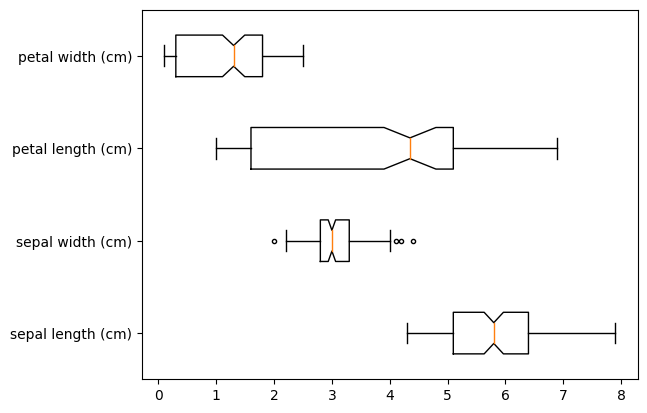

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(iris.data)
print('-'*75)
print('{:20} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*75)
for i, col in enumerate(cols):
    print('{:20} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(iris.feature_names[i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*75)

print('\nBoxplots of feature values:')
_ = plt.boxplot(cols_from_rows(iris.data), vert=False, notch=True, flierprops={'marker':'.'})
_ = plt.yticks(range(1,5), iris.feature_names)

### Logistic regression in scikit-learn

Now let's use logistic regression to learn a model of iris type given sepal and petal measurements.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

# Now let's fit a model
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)

print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:15])
print('Actual type of first five organisms from test split:', Y_test[:15])

Intercept: [  8.775413     1.60989219 -10.38530519]
Coefficients:
 [[-0.40882379  0.8471058  -2.20548192 -0.96488141]
 [ 0.60527174 -0.44107978 -0.16035026 -0.8906139 ]
 [-0.19644796 -0.40602602  2.36583217  1.85549531]]

Predicted type of first five organisms from test split: [1 2 2 0 2 1 0 2 0 1 1 2 2 2 0]
Actual type of first five organisms from test split: [1 2 2 0 2 1 0 1 0 1 1 2 2 2 0]


### Evaluating classification

Recall from week 7 that `sklearn.metrics` includes various evaluation measures.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

y_actu = pd.Series(Y_test, name='Actual')
y_pred_s1 = pd.Series(logreg.predict(X_test), name='Predicted')
confusion_matrix = pd.crosstab(y_actu, y_pred_s1)
print(confusion_matrix)


Classification report (0=setosa, 1=versicolor, 2=virginica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Predicted   0   1   2
Actual               
0          16   0   0
1           0  16   1
2           0   0  17


Confusion matrix (0=setosa, 1=versicolor, 2=virginica):



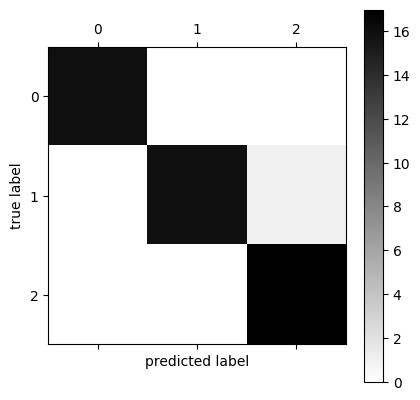

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print('Confusion matrix ({}):\n'.format(key))
_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test) ), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')


### TODO Choose parameters using grid search


- Choose the best C values in [1, 10, 100, 1000, 10000, 100000, 1000000] and the best penalty in ['l1', 'l2']
- Which is the best C? Which is the best penalty?
- How do precision, recall and f1 scores compare?

In [ ]:
# TODO: replace the content of this cell with your solution
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_grid = [{'C': [1,10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty':['l1', 'l2']}]
logreg = GridSearchCV(LogisticRegression(), param_grid,refit=True,verbose=3)
logreg.fit(X_train, Y_train)
print(logreg.cv_results_)
print(logreg.best_params_)
y_actu = pd.Series(Y_test, name='Actual')
y_pred_s1 = pd.Series(logreg.predict(X_test), name='Predicted')
confusion_matrix = pd.crosstab(y_actu, y_pred_s1)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=1.000 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.900 total time=   0.0s
[CV 3/5] END ...................C=1, penalty=l2;, score=1.000 total time=   0.0s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.950 total time=   0.0s
[CV 5/5] END ...................C=1, penalty=l2;, score=1.000 total time=   0.1s
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, penalty=l

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_grid = [{'C': [1,10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty':['l1', 'l2']}]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)
print(logreg.best_params_)

y_actu = pd.Series(Y_test, name='Actual')
y_pred_s1 = pd.Series(logreg.predict(X_test), name='Predicted')
confusion_matrix = pd.crosstab(y_actu, y_pred_s1)
print(confusion_matrix)

{'C': 10, 'penalty': 'l2'}
Predicted   0   1   2
Actual               
0          16   0   0
1           0  16   1
2           0   1  16


<h1><center>End of Tutorial!</center></h1>